<a href="https://colab.research.google.com/github/himanshukumarmishra23cs176/MLProject2/blob/main/mlproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [5]:
print("Training Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [6]:
print("\nTraining Data Head:")
train_df.head()


Training Data Head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print("Training Data Description:")
train_df.describe()

Training Data Description:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print("Missing Values in Training Data:")
print(train_df.isnull().sum())

Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


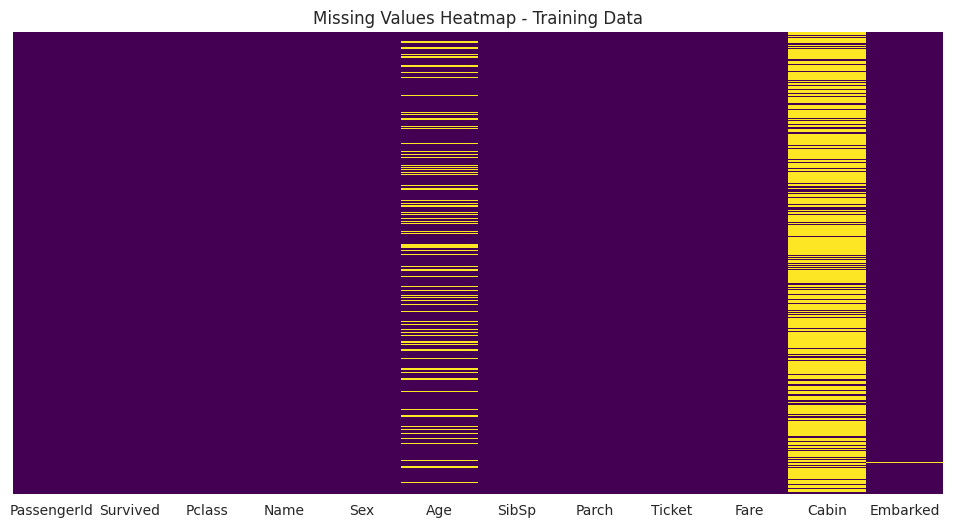

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Training Data')
plt.show()

In [10]:
age_median = train_df['Age'].median()
train_df['Age'].fillna(age_median, inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

/tmp/ipython-input-4225103097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(age_median, inplace=True)
/tmp/ipython-input-4225103097.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [11]:
embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(embarked_mode, inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3177889303.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(embarked_mode, inplace=True)
/tmp/ipython-input-3177889303.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [12]:
fare_median = test_df['Fare'].median()
test_df['Fare'].fillna(fare_median, inplace=True)

/tmp/ipython-input-974963242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(fare_median, inplace=True)


In [13]:
train_df['HasCabin'] = train_df['Cabin'].notnull().astype(int)
test_df['HasCabin'] = test_df['Cabin'].notnull().astype(int)

In [14]:
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

In [15]:
print("Missing values after handling:")
print(train_df.isnull().sum().sum(), "missing values in training data")
print(test_df.isnull().sum().sum(), "missing values in test data")

Missing values after handling:
0 missing values in training data
0 missing values in test data


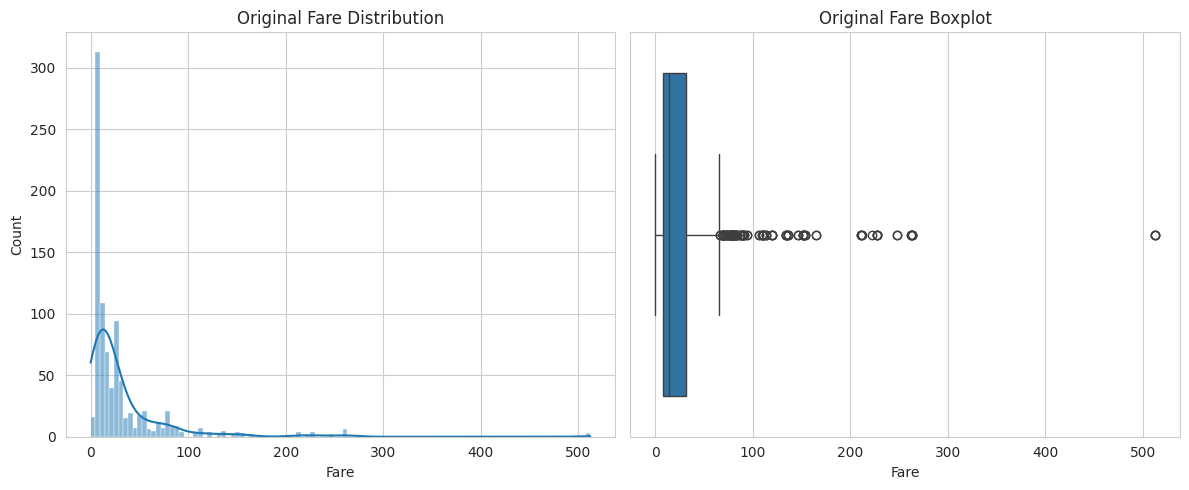

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_df['Fare'], kde=True)
plt.title('Original Fare Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['Fare'])
plt.title('Original Fare Boxplot')
plt.tight_layout()
plt.show()

In [24]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

print(f"Fare IQR: {IQR}")
print(f"IQR Lower bound: {lower_bound_iqr}, Upper bound: {upper_bound_iqr}")
outliers_iqr = train_df[(train_df['Fare'] < lower_bound_iqr) | (train_df['Fare'] > upper_bound_iqr)]
print(f"Number of outliers detected by IQR: {len(outliers_iqr)}")

Fare IQR: 23.0896
IQR Lower bound: -26.724, Upper bound: 65.6344
Number of outliers detected by IQR: 116


In [25]:
from scipy.stats import zscore

z_scores = zscore(train_df['Fare'].dropna())
outliers_z = np.abs(z_scores) > 3

print(f"Number of outliers detected by Z-score: {outliers_z.sum()}")

Number of outliers detected by Z-score: 20


In [26]:
from scipy.stats.mstats import winsorize

train_df['Fare_winsorized'] = winsorize(train_df['Fare'], limits=[0, 0.05])
test_df['Fare_winsorized'] = winsorize(test_df['Fare'], limits=[0, 0.05])

In [27]:
train_df['Fare_log'] = np.log1p(train_df['Fare'])
test_df['Fare_log'] = np.log1p(test_df['Fare'])

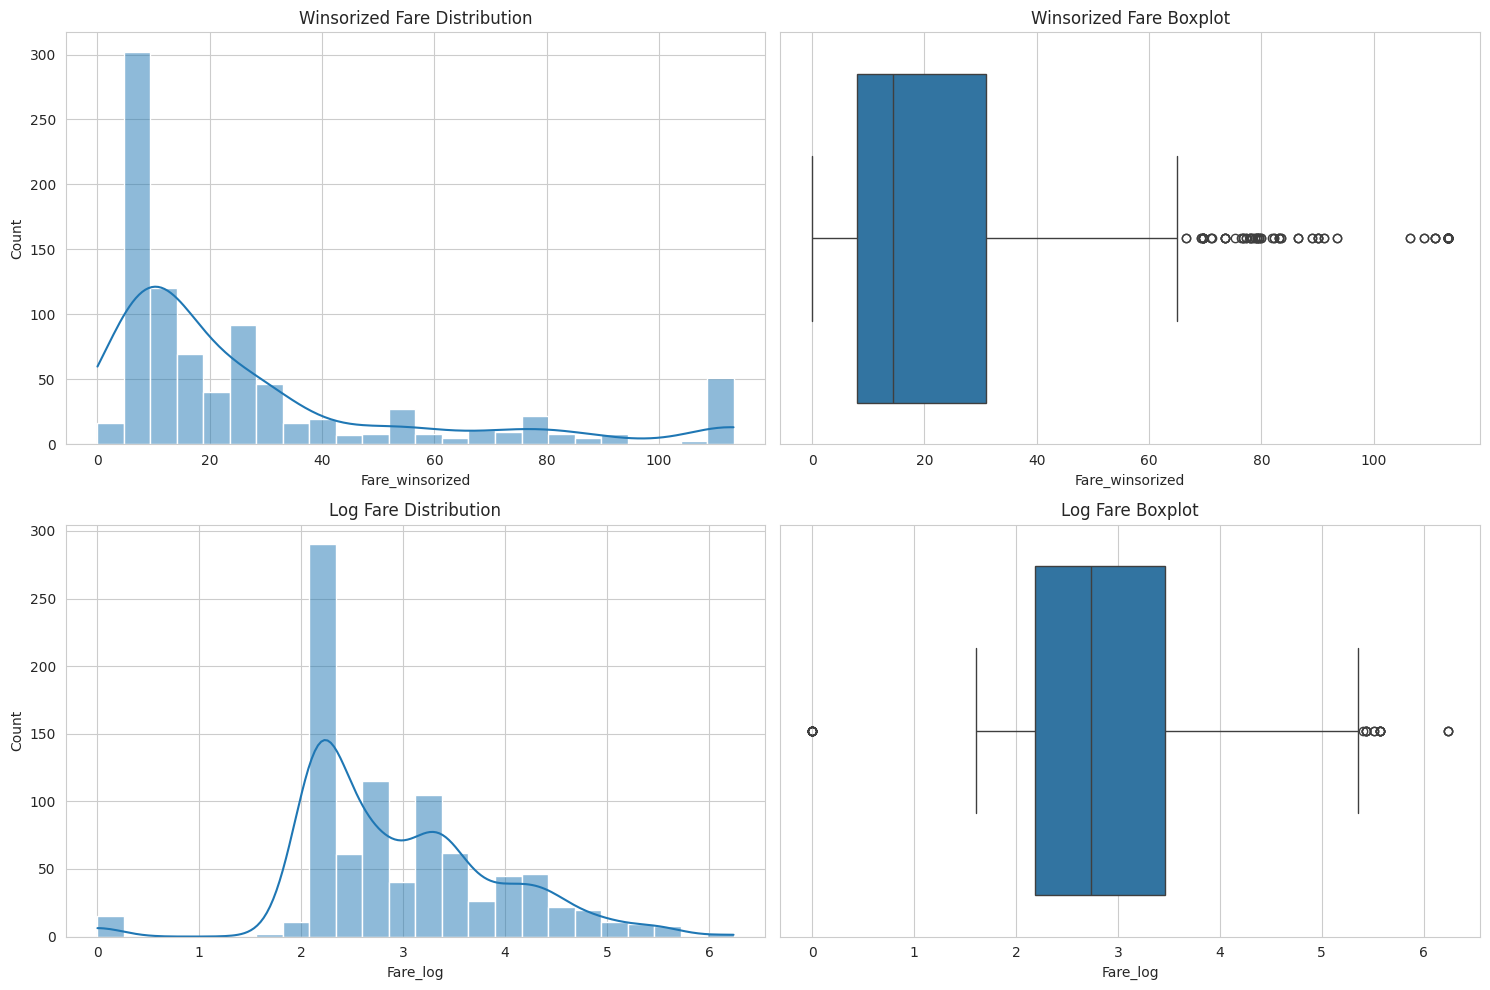

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(train_df['Fare_winsorized'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Winsorized Fare Distribution')

sns.boxplot(x=train_df['Fare_winsorized'], ax=axes[0, 1])
axes[0, 1].set_title('Winsorized Fare Boxplot')

sns.histplot(train_df['Fare_log'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Log Fare Distribution')

sns.boxplot(x=train_df['Fare_log'], ax=axes[1, 1])
axes[1, 1].set_title('Log Fare Boxplot')

plt.tight_layout()
plt.show()

In [33]:
Q1_win = np.percentile(train_df['Fare_winsorized'], 25)
Q3_win = np.percentile(train_df['Fare_winsorized'], 75)
IQR_win = Q3_win - Q1_win
lower_win = Q1_win - 1.5 * IQR_win
upper_win = Q3_win + 1.5 * IQR_win

outliers_win = train_df[(train_df['Fare_winsorized'] < lower_win) | (train_df['Fare_winsorized'] > upper_win)]
print(f"Outliers after winsorizing: {len(outliers_win)}")

Outliers after winsorizing: 116


In [31]:
Q1_log = np.percentile(train_df['Fare_log'], 25)
Q3_log = np.percentile(train_df['Fare_log'], 75)
IQR_log = Q3_log - Q1_log
lower_log = Q1_log - 1.5 * IQR_log
upper_log = Q3_log + 1.5 * IQR_log

outliers_log = train_df[(train_df['Fare_log'] < lower_log) | (train_df['Fare_log'] > upper_log)]
print(f"Outliers after log transformation: {len(outliers_log)}")

Outliers after log transformation: 31


In [34]:
train_df['Fare_processed'] = train_df['Fare_log']
test_df['Fare_processed'] = test_df['Fare_log']

print("Fare outliers handled using log transformation")

Fare outliers handled using log transformation


In [35]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("Unique titles in training data:")
print(train_df['Title'].value_counts())
print("\nUnique titles in test data:")
print(test_df['Title'].value_counts())

all_titles = set(train_df['Title'].unique()).union(set(test_df['Title'].unique()))
print(f"\nAll unique titles across both datasets: {all_titles}")

Unique titles in training data:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Unique titles in test data:
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

All unique titles across both datasets: {'Jonkheer', 'Dona', 'Major', 'Mlle', 'Countess', 'Lady', 'Ms', 'Mr', 'Dr', 'Mrs', 'Mme', 'Rev', 'Sir', 'Don', 'Col', 'Master', 'Capt', 'Miss'}


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3086790232.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipython-input-3086790232.py:2: SyntaxWarning: invalid escape sequence '\.'
  test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [37]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

train_df['HasSiblings'] = (train_df['SibSp'] > 0).astype(int)
test_df['HasSiblings'] = (test_df['SibSp'] > 0).astype(int)

train_df['ChildWithParents'] = ((train_df['Age'] < 18) & (train_df['Parch'] > 0)).astype(int)
test_df['ChildWithParents'] = ((test_df['Age'] < 18) & (test_df['Parch'] > 0)).astype(int)

train_df['AdultWithChildren'] = ((train_df['Age'] >= 18) & (train_df['Parch'] > 0)).astype(int)
test_df['AdultWithChildren'] = ((test_df['Age'] >= 18) & (test_df['Parch'] > 0)).astype(int)

In [38]:
categorical_cols = ['Sex', 'Embarked', 'Title']

train_encoded = pd.get_dummies(train_df[categorical_cols], prefix=categorical_cols)
test_encoded = pd.get_dummies(test_df[categorical_cols], prefix=categorical_cols)

In [39]:
for col in train_encoded.columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0

for col in test_encoded.columns:
    if col not in train_encoded.columns:
        train_encoded[col] = 0

all_columns = sorted(set(train_encoded.columns).union(set(test_encoded.columns)))
train_encoded = train_encoded.reindex(columns=all_columns).fillna(0)
test_encoded = test_encoded.reindex(columns=all_columns).fillna(0)

train_df = pd.concat([train_df, train_encoded], axis=1)
test_df = pd.concat([test_df, test_encoded], axis=1)

train_df.drop(categorical_cols, axis=1, inplace=True)
test_df.drop(categorical_cols, axis=1, inplace=True)

train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [40]:
print("\nSelected family-related features in training data:")
selected_family_features = ['FamilySize', 'IsAlone', 'HasSiblings', 'ChildWithParents', 'AdultWithChildren']

print("Selected family features sample:")
print(train_df[selected_family_features].head(10))


Selected family-related features in training data:
Selected family features sample:
   FamilySize  IsAlone  HasSiblings  ChildWithParents  AdultWithChildren
0           2        0            1                 0                  0
1           2        0            1                 0                  0
2           1        1            0                 0                  0
3           2        0            1                 0                  0
4           1        1            0                 0                  0
5           1        1            0                 0                  0
6           1        1            0                 0                  0
7           5        0            1                 1                  0
8           3        0            0                 0                  1
9           2        0            1                 0                  0


In [41]:
family_survival_corr = train_df[selected_family_features + ['Survived']].corr()['Survived'].sort_values(ascending=False)
print("\nCorrelation of selected family features with survival:")
print(family_survival_corr)


Correlation of selected family features with survival:
Survived             1.000000
HasSiblings          0.115867
ChildWithParents     0.111659
AdultWithChildren    0.086618
FamilySize           0.016639
IsAlone             -0.203367
Name: Survived, dtype: float64


In [42]:
print("\nSurvival rates by feature:")
for feature in selected_family_features:
    if train_df[feature].dtype == 'int64':
        survival_rate = train_df.groupby(feature)['Survived'].mean()
        print(f"\n{feature} survival rate:")
        print(survival_rate)

print("\nData types after encoding:")
print(train_df.dtypes)


Survival rates by feature:

FamilySize survival rate:
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

IsAlone survival rate:
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

HasSiblings survival rate:
HasSiblings
0    0.345395
1    0.466431
Name: Survived, dtype: float64

ChildWithParents survival rate:
ChildWithParents
0    0.366667
1    0.555556
Name: Survived, dtype: float64

AdultWithChildren survival rate:
AdultWithChildren
0    0.366271
1    0.484848
Name: Survived, dtype: float64

Data types after encoding:
PassengerId            int64
Survived               int64
Pclass                 int64
Age                  float64
SibSp                  int64
Parch                  int64
Fare                 float64
HasCabin               int64
Fare_log             float64
Fare_winsorized      float64
Fare_processed       float64
FamilySize 

In [43]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
categorical_features = [col for col in train_df.columns if col.startswith(('Sex_', 'Embarked_', 'Title_'))]
family_features = ['IsAlone', 'HasSiblings', 'ChildWithParents', 'AdultWithChildren']

all_features = numerical_features + categorical_features + family_features
target = 'Survived'

print(f"Total features: {len(all_features)}")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features[:5]}...")
print(f"Family features: {family_features}")

Total features: 32
Numerical features: ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
Categorical features: ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']...
Family features: ['IsAlone', 'HasSiblings', 'ChildWithParents', 'AdultWithChildren']


In [44]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
train_minmax = minmax_scaler.fit_transform(train_df[numerical_features])
test_minmax = minmax_scaler.transform(test_df[numerical_features])

In [45]:
train_minmax_df = pd.DataFrame(
    train_minmax,
    columns=[f'{col}_minmax' for col in numerical_features],
    index=train_df.index
)
test_minmax_df = pd.DataFrame(
    test_minmax,
    columns=[f'{col}_minmax' for col in numerical_features],
    index=test_df.index
)

In [46]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
train_standard = standard_scaler.fit_transform(train_df[numerical_features])
test_standard = standard_scaler.transform(test_df[numerical_features])

In [47]:
train_standard_df = pd.DataFrame(
    train_standard,
    columns=[f'{col}_standard' for col in numerical_features],
    index=train_df.index
)
test_standard_df = pd.DataFrame(
    test_standard,
    columns=[f'{col}_standard' for col in numerical_features],
    index=test_df.index
)

In [48]:
train_df = pd.concat([train_df, train_minmax_df, train_standard_df], axis=1)
test_df = pd.concat([test_df, test_minmax_df, test_standard_df], axis=1)

In [49]:
X = train_df[all_features]
y = train_df[target]

print(f"Shape of feature matrix: {X.shape}")

Shape of feature matrix: (891, 32)


In [50]:
correlation_with_target = X.corrwith(y).abs().sort_values(ascending=False)

print("Top features by correlation with target:")
print(correlation_with_target.head(15))

correlation_threshold = 0.1
selected_features_corr = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()

print(f"\nSelected {len(selected_features_corr)} features using correlation threshold {correlation_threshold}:")
print(selected_features_corr)

Top features by correlation with target:
Title_Mr             0.549199
Sex_male             0.543351
Sex_female           0.543351
Title_Mrs            0.339040
Title_Miss           0.327093
Fare                 0.257307
IsAlone              0.203367
Embarked_C           0.168240
Embarked_S           0.149683
HasSiblings          0.115867
ChildWithParents     0.111659
AdultWithChildren    0.086618
Title_Master         0.085221
Parch                0.081629
Title_Rev            0.064988
dtype: float64

Selected 11 features using correlation threshold 0.1:
['Title_Mr', 'Sex_male', 'Sex_female', 'Title_Mrs', 'Title_Miss', 'Fare', 'IsAlone', 'Embarked_C', 'Embarked_S', 'HasSiblings', 'ChildWithParents']


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

feature_importances = pd.DataFrame({'feature': all_features,'importance': rf.feature_importances_}).sort_values('importance', ascending=False)

print("\nTop features by Random Forest importance:")
print(feature_importances.head(15))


Top features by Random Forest importance:
             feature  importance
1               Fare    0.281067
0                Age    0.219273
23          Title_Mr    0.098062
9           Sex_male    0.080505
8         Sex_female    0.076871
4         FamilySize    0.047483
2              SibSp    0.034769
24         Title_Mrs    0.028122
20        Title_Miss    0.026463
3              Parch    0.021764
7         Embarked_S    0.013294
5         Embarked_C    0.012281
29       HasSiblings    0.010383
19      Title_Master    0.009308
30  ChildWithParents    0.008345


In [53]:
importance_threshold = 0.01
selected_features_rf = feature_importances[feature_importances['importance'] > importance_threshold]['feature'].tolist()

print(f"\nSelected {len(selected_features_rf)} features using importance threshold {importance_threshold}:")
print(selected_features_rf)


Selected 13 features using importance threshold 0.01:
['Fare', 'Age', 'Title_Mr', 'Sex_male', 'Sex_female', 'FamilySize', 'SibSp', 'Title_Mrs', 'Title_Miss', 'Parch', 'Embarked_S', 'Embarked_C', 'HasSiblings']


In [54]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

anova_scores = pd.DataFrame({'feature': all_features,'f_score': selector.scores_,'p_value': selector.pvalues_}).sort_values('f_score', ascending=False)

print("\nTop features by ANOVA F-test:")
print(anova_scores.head(15))

selected_features_anova = anova_scores[anova_scores['p_value'] < 0.05]['feature'].tolist()

print(f"\nSelected {len(selected_features_anova)} features using ANOVA (p < 0.05):")
print(selected_features_anova)


Top features by ANOVA F-test:
              feature     f_score       p_value
23           Title_Mr  383.945495  2.428783e-71
8          Sex_female  372.405724  1.406066e-69
9            Sex_male  372.405724  1.406066e-69
24          Title_Mrs  115.461086  2.094127e-25
20         Title_Miss  106.509051  1.159991e-23
1                Fare   63.030764  6.120189e-15
28            IsAlone   38.353651  9.009490e-10
5          Embarked_C   25.895987  4.397151e-07
7          Embarked_S   20.374460  7.223241e-06
29        HasSiblings   12.097484  5.293963e-04
30   ChildWithParents   11.223669  8.416110e-04
31  AdultWithChildren    6.720339  9.688437e-03
19       Title_Master    6.503635  1.093211e-02
3               Parch    5.963464  1.479925e-02
26          Title_Rev    3.770523  5.247894e-02

Selected 14 features using ANOVA (p < 0.05):
['Title_Mr', 'Sex_female', 'Sex_male', 'Title_Mrs', 'Title_Miss', 'Fare', 'IsAlone', 'Embarked_C', 'Embarked_S', 'HasSiblings', 'ChildWithParents', 'AdultW

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [55]:
print("\nComparison of feature selection methods:")
print(f"Correlation method selected {len(selected_features_corr)} features")
print(f"Random Forest method selected {len(selected_features_rf)} features")
print(f"ANOVA method selected {len(selected_features_anova)} features")


Comparison of feature selection methods:
Correlation method selected 11 features
Random Forest method selected 13 features
ANOVA method selected 14 features


In [56]:
common_features = set(selected_features_corr) & set(selected_features_rf) & set(selected_features_anova)
print(f"\nCommon features across all methods ({len(common_features)}):")
print(common_features)


Common features across all methods (9):
{'Title_Mr', 'Embarked_C', 'Sex_male', 'Sex_female', 'Title_Miss', 'HasSiblings', 'Title_Mrs', 'Fare', 'Embarked_S'}


In [57]:
all_selected_features = list(set(selected_features_corr) | set(selected_features_rf) | set(selected_features_anova))
print(f"\nUnion of all selected features ({len(all_selected_features)}):")
print(all_selected_features)


Union of all selected features (17):
['Sex_male', 'HasSiblings', 'Title_Mrs', 'Fare', 'Embarked_S', 'Title_Mr', 'Embarked_C', 'Sex_female', 'SibSp', 'Parch', 'Title_Master', 'Title_Miss', 'AdultWithChildren', 'Age', 'IsAlone', 'ChildWithParents', 'FamilySize']


Text(0, 0.5, 'Absolute Correlation')

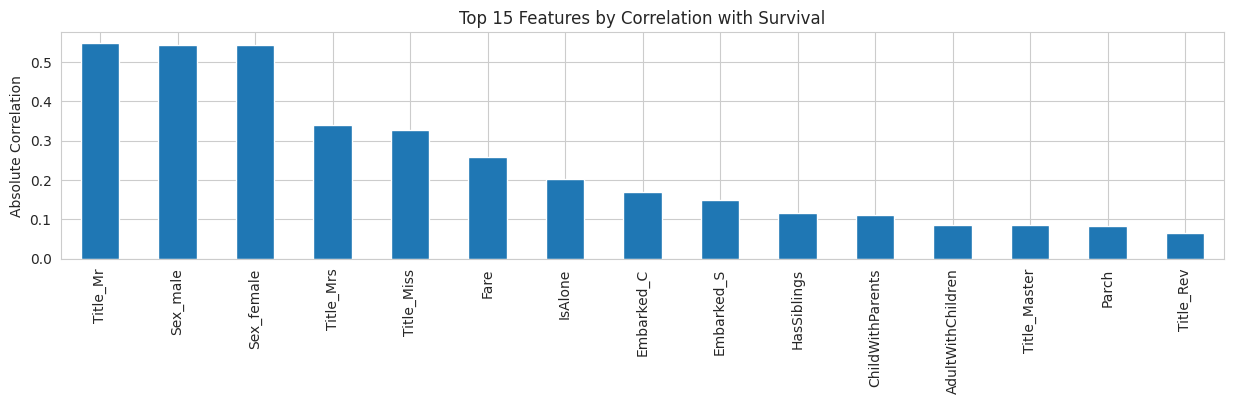

In [58]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
correlation_with_target.head(15).plot(kind='bar')
plt.title('Top 15 Features by Correlation with Survival')
plt.ylabel('Absolute Correlation')

Text(0, 0.5, 'Importance')

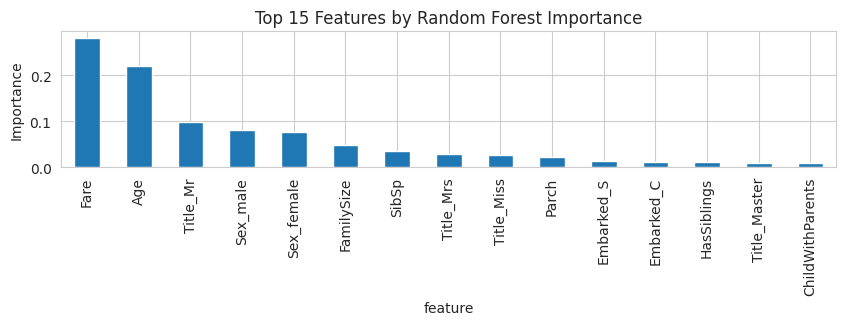

In [59]:
plt.subplot(3, 1, 2)
feature_importances.head(15).set_index('feature')['importance'].plot(kind='bar')
plt.title('Top 15 Features by Random Forest Importance')
plt.ylabel('Importance')

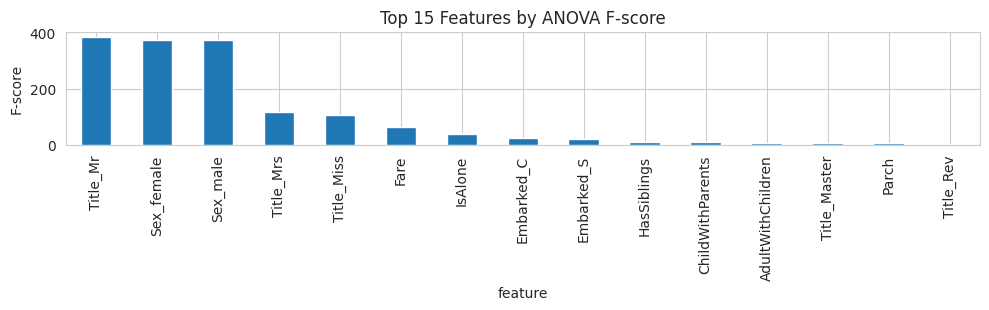

In [60]:
plt.subplot(3, 1, 3)
anova_scores.head(15).set_index('feature')['f_score'].plot(kind='bar')
plt.title('Top 15 Features by ANOVA F-score')
plt.ylabel('F-score')

plt.tight_layout()
plt.show()

In [61]:
final_features = all_selected_features
print(f"\nFinal selected features for modeling ({len(final_features)}):")
print(final_features)

X_final = train_df[final_features]
X_test_final = test_df[final_features]

print(f"\nFinal training set shape: {X_final.shape}")
print(f"Final test set shape: {X_test_final.shape}")


Final selected features for modeling (17):
['Sex_male', 'HasSiblings', 'Title_Mrs', 'Fare', 'Embarked_S', 'Title_Mr', 'Embarked_C', 'Sex_female', 'SibSp', 'Parch', 'Title_Master', 'Title_Miss', 'AdultWithChildren', 'Age', 'IsAlone', 'ChildWithParents', 'FamilySize']

Final training set shape: (891, 17)
Final test set shape: (418, 17)


**Bias Note on representativeness of Titanic passengers**

In [ ]:
The Titanic dataset exhibits several sampling biases that affect its representativeness.
There is significant class imbalance, with third-class passengers being overrepresented in the passenger list but having systematically different characteristics and outcomes compared to higher classes.
Gender representation is skewed in survival rates, reflecting the evacuation protocols rather than natural population distributions.
Age distribution is uneven, with certain age groups having substantially different survival patterns.
The dataset also contains missing information patterns that are not random, particularly for variables like Age and Cabin, which correlate with passenger class.
These biases mean that models trained on this data may learn patterns specific to these structural inequalities rather than generalizable relationships.
The dataset represents a specific snapshot with inherent sampling limitations that must be considered when interpreting analytical results or making generalizations beyond this specific passenger population.
